---
**Метрики классификации - Confusion matrix, Precision, Recall, F1 score, PR curve, ROC-AUC**

---
Видео и ноутбук МГУ Нейронные сети и их применение
в научных исследованиях  
https://msu.ai/introduction_to_ml

Учебник ШАд по метрикам  
https://academy.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii   

Статьи по метрикам  
https://www.v7labs.com/blog/confusion-matrix-guide  
https://webiomed.ru/blog/osnovnye-metriki-zadach-klassifikatsii-v-mashinnom-obuchenii/  
https://qudata.com/ml/ru/ML_Binary_Metrics.html  
https://machinelearningmastery.ru/20-popular-machine-learning-metrics-part-1-classification-regression-evaluation-metrics-1ca3e282a2ce/  
https://habr.com/ru/companies/ods/articles/328372/  

Статья про Confusion matrix  
https://habr.com/ru/articles/758510/

Статья с демонстрацией как работают `macro` `micro` усреднения в метриках `sklearn`  
(то что отображается в `sklearn.metrics.classification_report`)  
https://www.evidentlyai.com/classification-metrics/multi-class-metrics

---

# Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
plt.style.use('dark_background')
# plt.rcParams["figure.figsize"] = (6, 4)
# plt.rcParams['font.size'] = 10

# Data

Датасет грибов Kaggle  
https://www.kaggle.com/datasets/uciml/mushroom-classification


In [ ]:
# откатить версию библиотеки kaggle чтобы не было ошибки KeyError: 'username'
!pip install kaggle==1.6.17

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105787 sha256=b9b96830dea3117af9acffaa92139f0dced72e653f1a12110a9fdb21a57493a2
  Stored in directory: /root/.cache/pip/wheels/ff/55/fb/b27a466be754d2a06ffe0e37b248d844f090a63b51becea85d
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.7.4.2
    Uninstalling kaggle-1.7.4.2:
      Successfully uninstalled kaggle-1.7.4.2


In [ ]:
# загрузка датасета
!kaggle datasets download -d uciml/mushroom-classification

Dataset URL: https://www.kaggle.com/datasets/uciml/mushroom-classification
License(s): CC0-1.0
  0% 0.00/34.2k [00:00<?, ?B/s]
100% 34.2k/34.2k [00:00<00:00, 20.9MB/s]


In [ ]:
# распаковка архива датасета
!unzip mushroom-classification.zip

Archive:  mushroom-classification.zip
  inflating: mushrooms.csv           


In [ ]:
# чтение датасета
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Распределения по классам  
Edible - съедобный, poisonous - ядовитый

In [ ]:
# посмотреть распределение по классам
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

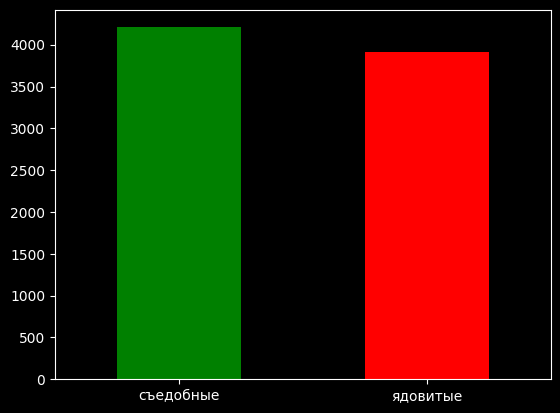

In [ ]:
# отрисовать распределение по классам
df['class'].value_counts().plot.bar(color=['green', 'red'])
plt.xticks([0, 1], ['съедобные', 'ядовитые'], rotation=0)
plt.show()

Кодировать строковые значения в числовые

In [ ]:
from sklearn.preprocessing import LabelEncoder

# энкодер для преобразования строковых меток в числовые [a, b, c] -> [0, 1, 2]
labelencoder = LabelEncoder()
data = df.copy()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])

data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Если нужно инвертировать классы - поменять местами метки 1 и 0

In [ ]:
# data['class'] = (data['class'] - 1).astype(bool).astype(int)
# data.head()

In [ ]:
# макс значения в каждом столбце
data.max()

class                        1
cap-shape                    5
cap-surface                  3
cap-color                    9
bruises                      1
odor                         8
gill-attachment              1
gill-spacing                 1
gill-size                    1
gill-color                  11
stalk-shape                  1
stalk-root                   4
stalk-surface-above-ring     3
stalk-surface-below-ring     3
stalk-color-above-ring       8
stalk-color-below-ring       8
veil-type                    0
veil-color                   3
ring-number                  2
ring-type                    4
spore-print-color            8
population                   5
habitat                      6
dtype: int64

Формирование входов и выходов для модели

In [ ]:
# в качестве y предсказывать будем ядовитый гриб или нет
x = data.drop(["class"], axis=1).values
y = data["class"].values

# разделение на трейн и тест
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=111)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6093, 22), (2031, 22), (6093,), (2031,))

# Train model

Инициализация модели, обучение и проверка метрики качества на тестовом наборе

In [ ]:
from sklearn.linear_model import LogisticRegression

# создание модели
model = LogisticRegression(max_iter=1000)  # solver="newton-cg"

# обучение модели
model.fit(x_train, y_train)

# для задач классификации model.score чаще всего вычисляет метрику Accuracy
score = model.score(x_test, y_test)
print(f'Test Accuracy: {score:.2f}')

Test Accuracy: 0.95


# Как работает model.predict()

Как происходит предикт моделью под капотом

In [ ]:
# predict_proba выдает вероятности, где столбец 0 - вероятности грибов быть неядовитыми - классом 0
model.predict_proba(x_test)

array([[9.99542389e-01, 4.57610715e-04],
       [1.27027855e-01, 8.72972145e-01],
       [8.30078544e-01, 1.69921456e-01],
       ...,
       [3.30468627e-01, 6.69531373e-01],
       [3.29226052e-02, 9.67077395e-01],
       [8.90426731e-01, 1.09573269e-01]])

In [ ]:
# реальные метки
y_test

array([0, 1, 0, ..., 1, 1, 0])

In [ ]:
# извлчеь первый гриб из датасета
mushroom = data[:1].iloc[:, 1:].values
mushroom

array([[5, 2, 4, 1, 6, 1, 0, 1, 4, 0, 3, 2, 2, 7, 7, 0, 2, 1, 4, 2, 3, 5]])

In [ ]:
# вектор параметров w модели - каждое w для каждого столбца
model.coef_, model.coef_.shape

(array([[-0.03739162,  0.46595871, -0.02998091, -0.60733506, -0.43650954,
         -1.76597881, -6.02206293,  7.1819865 , -0.11433825, -0.14383003,
         -1.92747276, -4.31180682, -0.19192469, -0.11943164, -0.03184675,
          0.        ,  7.45108044,  0.72994435,  0.76970462, -0.3327583 ,
         -0.39652116,  0.10177053]]),
 (1, 22))

In [ ]:
# линейная комбинация весов и данных гриба - это называется логиты
logits = mushroom @ model.coef_.T + model.intercept_
logits

array([[1.56583036]])

In [ ]:
# пропустить логиты через сигмоиду - получить вероятность класса 1
1 / (1 + np.exp(-logits))

array([[0.82718838]])

In [ ]:
# предикт гриба моделью - нулевой столбец - вероятность гриба быть классом 0 - неядовитым
model.predict_proba(mushroom)

array([[0.17281162, 0.82718838]])

In [ ]:
# сделать предсказание с настройкой порога вероятности
# отнести гриб к ядовитому только если его вероятность быть ядовитым больше threshold
threshold = 0.9
predict_label = (model.predict_proba(mushroom)[:, 1] > threshold).astype(int)

predict_label

array([0])

# Accuracy

Метрика accuracy  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.948301329394387

In [ ]:
# расчет метрики accuracy вручную
y_pred = model.predict(x_test)
(y_pred == y_test).mean()

0.948301329394387

Метрика Balanced accuracy для несбалансированных классов  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html

In [ ]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)

0.9481290554106088

# Confusion_matrix

Из чего состоит Confusion matrix  
<img src="https://drive.google.com/uc?export=view&id=1ogMd9Jto8kXUUhjBLWAs2yhFeMpB0Etu" width=70%>

Тоже самое с точки зрения гипотез  
Ошибка первого рода - неверно отвергнуть нулевую гипотезу (сказать здоровому что он болен).  
Ошибка второго рода - неверно принять нулевую гипотезу (сказать больному что он здоров).

<img src=https://cf2.ppt-online.org/files2/slide/p/p9VadHo5GMniwNuXqzr3TZk7tLJS6WxQgKsCmABhP/slide-24.jpg width=70%>

Как выглядит [Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) в Sklearn и почему возникает [путаница](https://stackoverflow.com/questions/58373488/why-does-my-sklearn-metrics-confusion-matrix-output-look-transposed)  

<img src="https://drive.google.com/uc?export=view&id=1Met6NODUOl90vIbYkkXZNztIrrvDrtU3" width=70%>

Отрисовка Confusion Matrix как в Sklearn

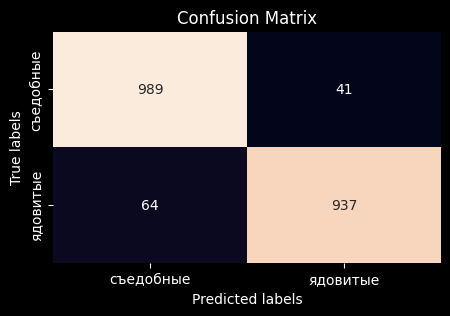

In [ ]:
# получаем предсказания модели на тестовых данных
y_pred = model.predict(x_test)

# подаем реальные метки и метки предсказанные моделью
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt=".0f", cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['съедобные', 'ядовитые'])
ax.yaxis.set_ticklabels(['съедобные', 'ядовитые'])
plt.show()

In [ ]:
# распаковка матрицы
TN, FP, FN, TP = cm.ravel()

print('True positive = ', TP)
print('False positive = ', FP)
print('True negative = ', TN)
print('False negative = ', FN)

True positive =  937
False positive =  41
True negative =  989
False negative =  64


Подсчет TP, FP, TN, FN вручную

In [ ]:
TP = 0
FP = 0
TN = 0
FN = 0

# итерация по индексам всех объектов
for i in range(len(y_pred)):
    if y_test[i] == y_pred[i] == 1:
        TP += 1
    if y_pred[i] == 1 and y_test[i] != y_pred[i]:
        FP += 1
    if y_test[i] == y_pred[i] == 0:
        TN += 1
    if y_pred[i] == 0 and y_test[i] != y_pred[i]:
        FN += 1

print('True positive = ', TP)
print('False positive = ', FP)
print('True negative = ', TN)
print('False negative = ', FN)

True positive =  937
False positive =  41
True negative =  989
False negative =  64


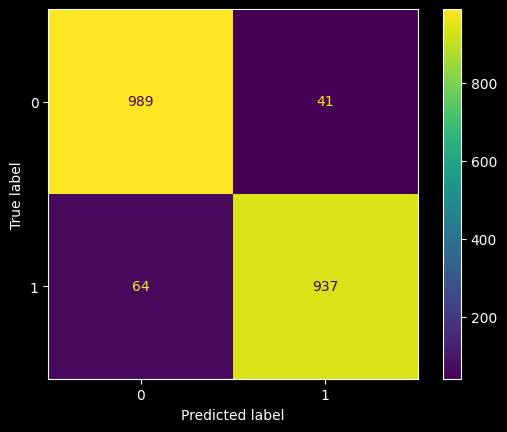

In [ ]:
# еще способ отрисовки
# from sklearn.metrics import ConfusionMatrixDisplay
# ConfusionMatrixDisplay.from_estimator(model, x_test, y_test);

Отрисовка Confusion Matrix не как в Sklearn а как на оригинальной картинке - добавить параметр `labels=[1, 0]`

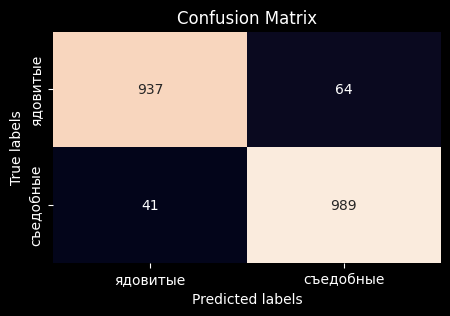

In [ ]:
# получаем предсказания модели на тестовых данных
y_pred = model.predict(x_test)

# устанавливаем параметр labels=[1, 0]
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

fig, ax = plt.subplots(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt=".0f", cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['ядовитые', 'съедобные'])
ax.yaxis.set_ticklabels(['ядовитые', 'съедобные'])
plt.show()

Отрисовка Матриц ошибок для нескольких пороов вероятности (трешхолдов)    
Если threshold увеличивается то модель будет срабатывать только если очень уверена (говорить что гриб ядовитый)  
Как следствие TP уменьшается, ошибка второго рода FN растет - все больше грибов модель классифицирует как нормальные, но среди них есть ядовитые и она их пропускает, потому что порог при котором она сработает очень высокий  

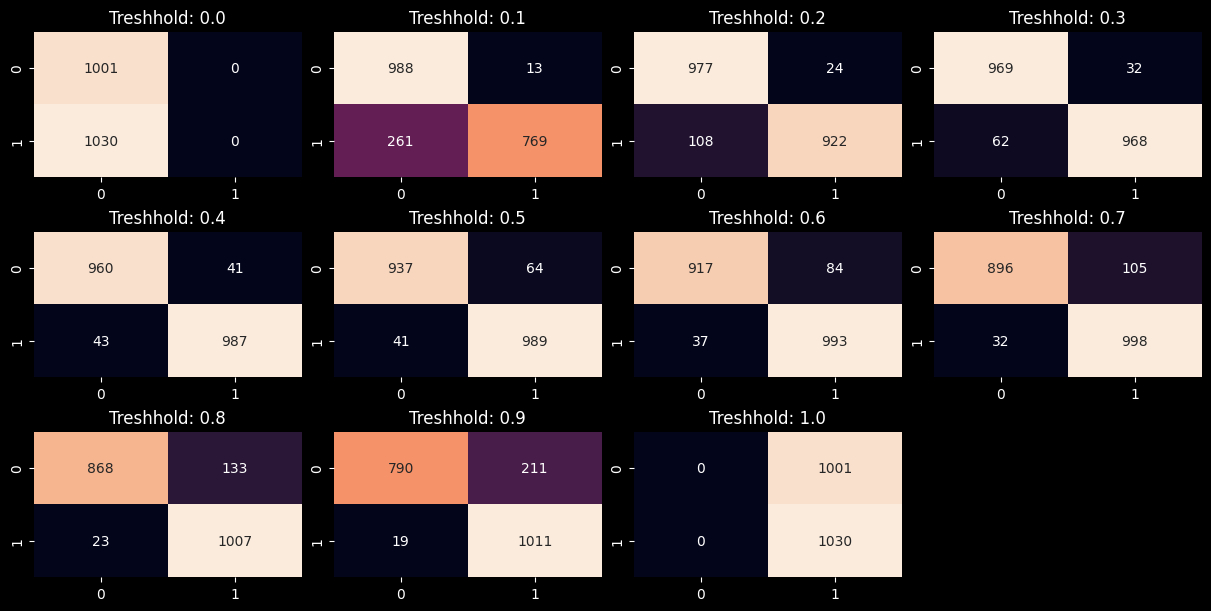

In [ ]:
# перебор порогов вероятностей от 0 до 1 включительно и расчет матриц ошибок для кажого порога
thresholds = np.arange(0, 1.1, 0.1)
fig, axes = plt.subplots(3, 4, figsize=(12, 6), constrained_layout=True)

# итерация по порогам вероятностей - трешхолдам, и по графикам
for threshold, ax in zip(thresholds, axes.ravel()):
    # относим к классу 1 если вероятности быть классом 1 больше порога
    y_pred = model.predict_proba(x_test)[:, -1] > threshold
    cm = confusion_matrix(y_test, y_pred, labels=[1, 0])  # вывод как на картинках в инете
    ax.set_title(f'Treshhold: {threshold:.1f}')
    sns.heatmap(cm, annot=True, fmt=".0f", cbar=False, ax=ax)

plt.axis('off')
plt.show()

# Precison Recall Accuracy F1-score

<img src=https://skylarhaskiell.github.io/rnd/www/metrics.png width=50%>

Функция `classification_report` подсчитывает метрики `precision` `recall` `f1-score`  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [ ]:
from sklearn.metrics import classification_report

# получаем предсказания модели на тестовых данных
y_pred = model.predict(x_test)

# расчет и вывод метрик
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1030
           1       0.96      0.94      0.95      1001

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



In [ ]:
# можно подисать названия классов
print(classification_report(y_test, y_pred, target_names=['Съедобные', 'Ядовитые']))

              precision    recall  f1-score   support

   Съедобные       0.94      0.96      0.95      1030
    Ядовитые       0.96      0.94      0.95      1001

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



Расчет через `precision_recall_fscore_support`

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# расчет так же как в classification_report
precision, recall, f1score, support =  precision_recall_fscore_support(y_test, y_pred)
precision, recall, f1score, support

(array([0.93922127, 0.95807771]),
 array([0.96019417, 0.93606394]),
 array([0.94959193, 0.9469429 ]),
 array([1030, 1001]))

In [ ]:
# расчет с выбором метода усреднения (macro, micro, binary, weighted, samples)
precision, recall, f1score, support =  precision_recall_fscore_support(y_test, y_pred, average='macro')
print(f'precision: {precision:.2f}\nrecall: {recall:.2f}\nf1score: {f1score:.2f}')

precision: 0.95
recall: 0.95
f1score: 0.95


Расчет Precison Recall Accuracy через отдельные функции из sklearn

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

# получить предсказания модели на тестовых данных
y_pred = model.predict(x_test)
y_pred

array([0, 1, 0, ..., 1, 1, 0])

Расчет Accuracy

In [ ]:
# метрика accuracy - доля правильных ответов
accuracy_score(y_test, y_pred)

0.948301329394387

In [ ]:
# метрика accuracy - доля правильных ответов
(TP + TN) / (TP + TN + FP + FN)

0.948301329394387

Расчет Precision

In [ ]:
# метрика presicion - точность
precision_score(y_test, y_pred)

0.9580777096114519

In [ ]:
# метрика presicion - точность
TP / (TP + FP)

0.9580777096114519

Расчет Recall

In [ ]:
# метрика recall (полнота, чувствительность)
recall_score(y_test, y_pred)

0.936063936063936

In [ ]:
# метрика recall (полнота, чувствительность)
TP / (TP + FN)

0.936063936063936

Расчет F1 score

In [ ]:
# метрика f1 score - гармоническое среднее между точностью (precision) и полнотой (recall)
f1_score(y_test, y_pred)

0.946942900454775

In [ ]:
# метрика f1 score - гармоническое среднее между точностью (precision) и полнотой (recall)
precision = TP / (TP + FP)
recall = TP / (TP + FN)

2 * (precision * recall) / (precision + recall)

0.946942900454775

**Зависимость метрик precision и recall в зависимости от увеличения порога вероятности для отнесения к классу 1**

---
Precision (точность) увеличивается - это означает что больше ядовитых грибов классифицируем верно среди всех на которые модель сказала что они ядовитые  
Precision это то насколько модель точна в своих предсказаниях класса 1

Precision высокий когда всем грибам говорим что они не ядовитые, или все люди здоровые - таким образом модель будет меньше ошибаться в предсказании класса 1, но тем чаще мы можем ошибочно сказать что гриб является не ядовитым когда он на самом деле ядовитый, или больному что он здоров

---
Recall (полнота, чувствительность) падает - все меньше ядовитых грибов модель классифицирует верно среди всех реально ядовитых из датасета  
Recall это то насколько хорошо модель обнаруживает классы 1 в датасете

Recall высокий когда всем грибам говорим что они ядовитые, или все люди больные - так мы точно обнаружим всех ядовитых и больных из датасета, но тем чаще мы можем ошибочно сказать что гриб является ядовитым когда он на самом деле нормальный, или здоровому что он болен

In [ ]:
# перебор порогов вероятностей и расчет precision, recall для каждого порога
thresholds = np.arange(0, 1.1, 0.1)

for threshold in thresholds:
    # вероятности быть классом 1
    y_pred = model.predict_proba(x_test)[:, -1] > threshold
    # zero_division=1 для случая когда threshold равен 1
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred)

    print(f'Treshhold: {threshold:.1f}, Precision: {precision:.2f}, Recall: {recall:.2f}')
    print('-' * 40)

Treshhold: 0.0, Precision: 0.49, Recall: 1.00
----------------------------------------
Treshhold: 0.1, Precision: 0.79, Recall: 0.99
----------------------------------------
Treshhold: 0.2, Precision: 0.90, Recall: 0.98
----------------------------------------
Treshhold: 0.3, Precision: 0.94, Recall: 0.97
----------------------------------------
Treshhold: 0.4, Precision: 0.96, Recall: 0.96
----------------------------------------
Treshhold: 0.5, Precision: 0.96, Recall: 0.94
----------------------------------------
Treshhold: 0.6, Precision: 0.96, Recall: 0.92
----------------------------------------
Treshhold: 0.7, Precision: 0.97, Recall: 0.90
----------------------------------------
Treshhold: 0.8, Precision: 0.97, Recall: 0.87
----------------------------------------
Treshhold: 0.9, Precision: 0.98, Recall: 0.79
----------------------------------------
Treshhold: 1.0, Precision: 1.00, Recall: 0.00
----------------------------------------


# PR curve

Precision Recall кривая (precision recall curve)  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html

In [ ]:
# получить предсказания модели в виде вероятностей через predict_proba
y_probs = model.predict_proba(x_test)[:, -1]
y_probs.shape

(2031,)

In [ ]:
from sklearn.metrics import precision_recall_curve

# precision_recall_curve берет столько порогов веротяности сколько элементов в датасете,
# расчитывает precision, recall для каждого порога и возвращает все в виде массивов (оси X и Y на графике)
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# значений столько сколько объектов в переданной тестовой выборке (thresholds меньше на одну)
precision.shape, recall.shape, thresholds.shape

((2032,), (2032,), (2031,))

In [ ]:
precision, recall, thresholds

(array([0.49286066, 0.49310345, 0.49334648, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.99800200e-03, 9.99000999e-04, 0.00000000e+00]),
 array([1.32121417e-07, 1.66068075e-07, 1.86184111e-07, ...,
        9.99950628e-01, 9.99952521e-01, 9.99953478e-01]))

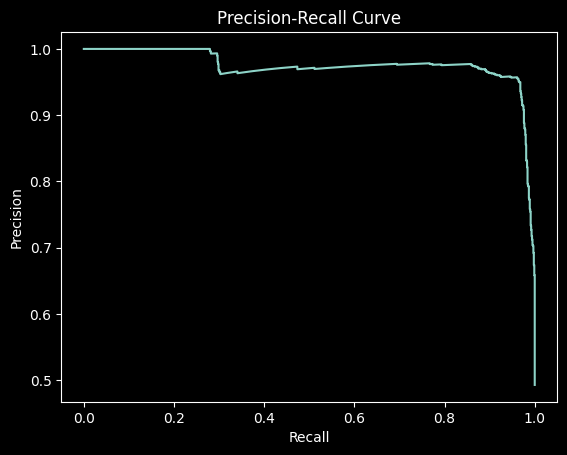

In [ ]:
# построить PR кривую
fig, ax = plt.subplots()
ax.plot(recall, precision)
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

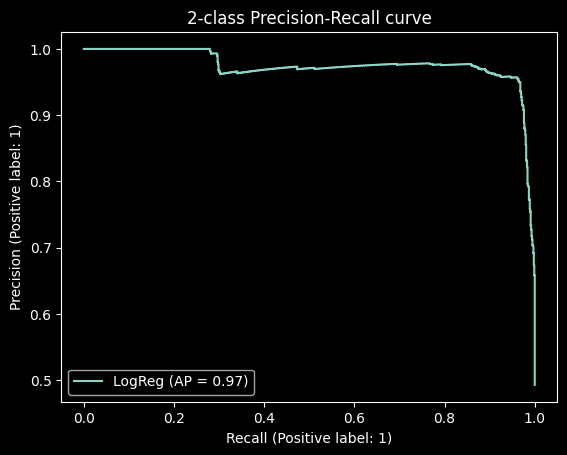

In [ ]:
# # еще способ
# from sklearn.metrics import PrecisionRecallDisplay

# display = PrecisionRecallDisplay.from_estimator(model, x_test, y_test, name="LogReg")
# display.ax_.set_title("2-class Precision-Recall curve");

Расчет precision и recall вручную

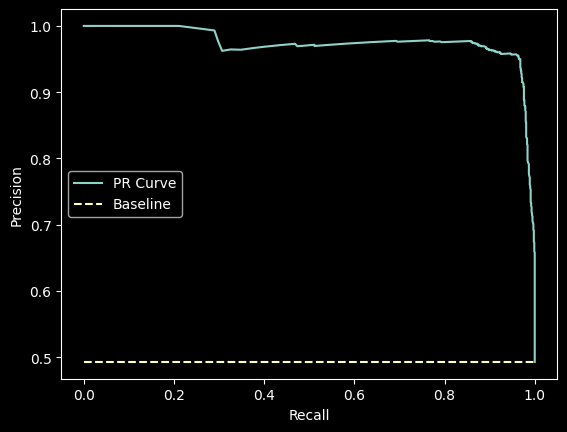

In [ ]:
# способ вручную
# https://medium.com/@douglaspsteen/precision-recall-curves-d32e5b290248

precision_scores = []
recall_scores = []

# порогов веротяностей можно взять сколько хотим
probs_thresholds = np.linspace(0, 1, num=1000)

# итерация по всем попрогам и расчет precision и recall для каждого
for prob in probs_thresholds:
    y_pred = model.predict_proba(x_test)[:, -1] > prob
    y_pred = y_pred.astype(int)

    # zero_division=1 - если вдруг деление на 0 то вставить 1
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)

    precision_scores.append(precision)
    recall_scores.append(recall)

# отрислвка PR Curve
plt.plot(recall_scores, precision_scores, label='PR Curve')
baseline = len(y_test[y_test == 1]) / len(y_test)
plt.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

AUC (Area under curve) - площадь под кривой    
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html#sklearn.metrics.auc

In [ ]:
# area under curve - площадь под кривой
from sklearn.metrics import auc, average_precision_score

# auc принимает массивы оценок точности и полноты
print(f'AUC-PR: {auc(recall_scores, precision_scores)}')

AUC-PR: 0.9742194664474727


Average precision_score - средняя точность  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html

In [ ]:
# принимает таргет метки классов и вероятности, предсказанные моделью
average_precision_score(y_test, y_probs)

0.9744806005528229

# ROC-AUC

ROC-AUC (Area Under the Receiver Operating Characteristic Curve) - площадь под ROC кривой   
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

In [ ]:
# получить предсказания модели в виде вероятностей через predict_proba
y_probs = model.predict_proba(x_test)[:, -1]
y_probs.shape

(2031,)

In [ ]:
from sklearn.metrics import roc_auc_score

# расчет площади под ROC кривой
roc_auc = metrics.roc_auc_score(y_test, y_probs)
roc_auc

0.9801489772363559

Receiver Operating Characteristic Curve - для отрисовки ROC кривой  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

In [ ]:
from sklearn.metrics import roc_curve

# так же как в precision_recall_curve, берет пороги веротяностей и считает
# метрики TPR, FPR для каждого порога вероятностей, и возвращает в виде массивов (оси X и Y на графике)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_probs)

false_positive_rate.shape, true_positive_rate.shape, thresholds.shape

((150,), (150,), (150,))

<img src=https://res.cloudinary.com/dyd911kmh/image/upload/v1674126967/True_Positive_Fals_Positive_11acfeba57.png width=50%>

TPR = TP / (TP + FN) (Recall)  
FPR = FP / (FP + TN)

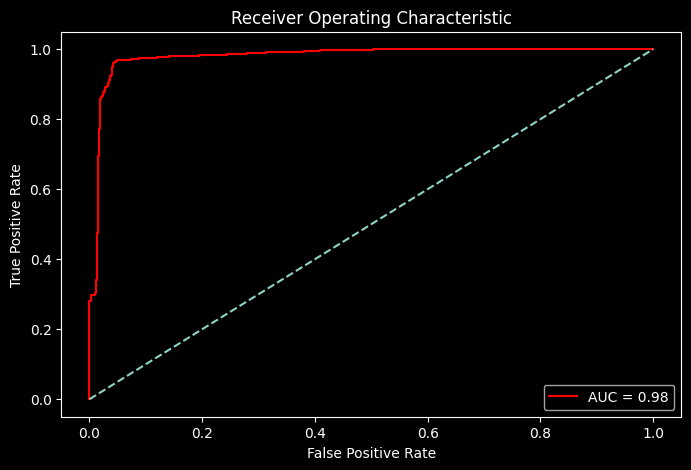

In [ ]:
# отрисовка roc curve
plt.figure(figsize=(8, 5))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='red', label=f'AUC = {roc_auc:.2f}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()